In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('0700.hk')

[*********************100%***********************]  1 of 1 completed


In [3]:
# data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)

In [4]:
data.shape

(4405, 6)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-16,0.875,0.925,0.815,0.830,0.802119,2198875000
2004-06-17,0.830,0.875,0.825,0.845,0.816615,419007500
2004-06-18,0.840,0.850,0.790,0.805,0.777959,182990000
2004-06-21,0.820,0.825,0.790,0.800,0.773127,114085000
2004-06-22,0.800,0.800,0.800,0.800,0.773127,0


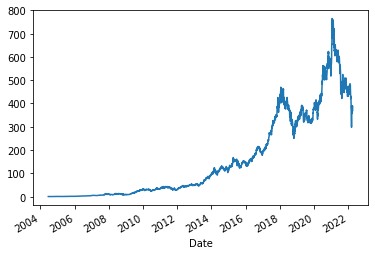

In [6]:
# Plot the close prices
data["Adj Close"].plot()
plt.show()

In [7]:
X_test1=np.array(data)
Y_test1=np.array(data["Adj Close"])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_test1, Y_test1, test_size=0.2)

In [9]:
# SVM Model
svr = make_pipeline(MinMaxScaler(feature_range=(0,1)),SVR())
# Train the model 
svr.fit(x_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR())])

In [10]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9726192064730637


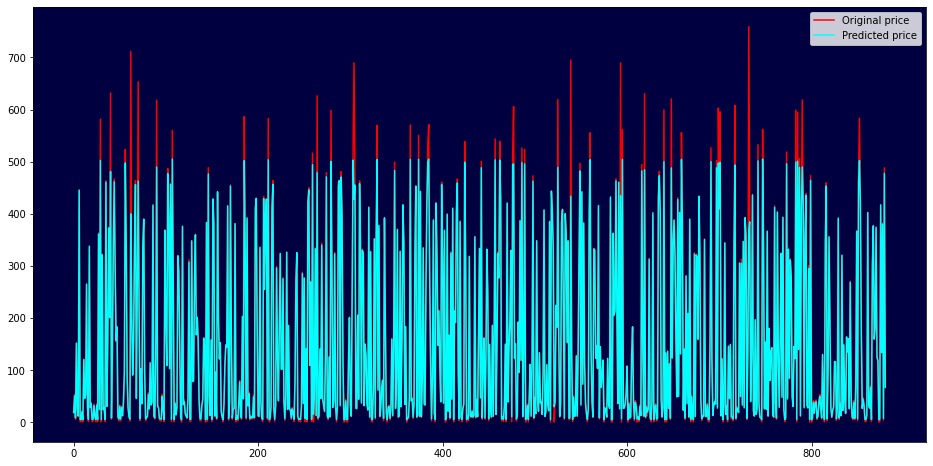

In [11]:
predictions = svr.predict(x_test)
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

# Prediction on UNSEEN DATA

In [12]:
data_val=yf.download('0005.hk','2020-01-02','2020-01-31')
x_val=np.array(np.array(data_val.drop(["Adj Close","Volume","Close"],1)))
y_val=np.array(data_val['Adj Close'])
predictions = svr.predict(x_val)
# predictions = scaler.inverse_transform(predictions.reshape(-1,1))
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_val, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

[*********************100%***********************]  1 of 1 completed


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_14652/2157980436.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val=np.array(np.array(data_val.drop(["Adj Close","Volume","Close"],1)))


ValueError: X has 3 features, but MinMaxScaler is expecting 6 features as input.

# Test using different kernel function

In [ ]:
# SVM Model
regr = make_pipeline(MinMaxScaler(),SVR(kernel="linear",C=1.0, epsilon=0.2))
# svr = SVR(kernel='linear', C=1e3, gamma=0.1)
# Train the model 
regr.fit(x_train, y_train)
# The best possible score is 1.0
regr_confidence = regr.score(x_test, y_test)
print("regr confidence: ", regr_confidence)

In [ ]:
predictions = svr.predict(x_test)
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions, color='cyan',marker=".",label='Predicted price')
plt.legend()

In [ ]:
data_val=yf.download('0005.hk','2020-01-02','2020-01-31')
x_val=np.array(np.array(data_val.drop(["Adj Close",'Volume',"Close"],1)))
y_val=np.array(data_val['Adj Close'])
predictions = regr.predict(x_val)
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor('#000041')
ax.plot(y_val, color='red', marker=".",label='Original price')
plt.plot(predictions, color='cyan',marker=".", label='Predicted price')
plt.legend()

# TEST - Random Forest

In [ ]:
# RF Model
RFR= make_pipeline(StandardScaler(),RandomForestRegressor())
# svr = SVR(kernel='linear', C=1e3, gamma=0.1)
# Train the model 
RFR.fit(x_train, y_train)
# The best possible score is 1.0
rfr_confidence = RFR.score(x_test, y_test)
print("regr confidence: ", rfr_confidence)

In [ ]:
predictions = svr.predict(x_test)
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [ ]:
data_val=yf.download('0005.hk','2020-01-02','2020-01-31')
x_val=np.array(np.array(data_val.drop(["Adj Close",'Volume',"Close"],1)))
y_val=np.array(data_val['Adj Close'])
predictions = RFR.predict(x_val)
fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_val, color='red', marker=".",label='Original price')
plt.plot(predictions, color='cyan',marker=".", label='Predicted price')
plt.legend()